<a href="https://colab.research.google.com/github/romapryan/pyda-6-hw-14/blob/master/pyda_6_hw_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

Можно взять свой датасет или воспользоваться одним из приведенных ниже:

* Данные IMDB;

* **Данные NYC**;

* Данные NBA.

**test.csv** - the testing set (contains 625134 trip records)

* id - a unique identifier for each trip
* vendor_id - a code indicating the provider associated with the trip record
* pickup_datetime - date and time when the meter was engaged
* dropoff_datetime - date and time when the meter was disengaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* trip_duration - duration of the trip in seconds

Disclaimer: The decision was made to not remove dropoff coordinates from the dataset order to provide an expanded set of variables to use in Kernels.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 9, 6

In [18]:
data = pd.read_csv("train.csv")
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


**1. Pickups by Hour**

Цель: увидеть изменения в количестве заказов в течение дня за весь период.

Переменные: час, извлечённый из pickup_datetime, и количество поездок. 

Тип графика: линейная диаграмма, поскольку на ней хорошо видна динамика от начала дня к его концу и разница в количестве поездок по часам.


Text(0.5, 0, 'Hours')

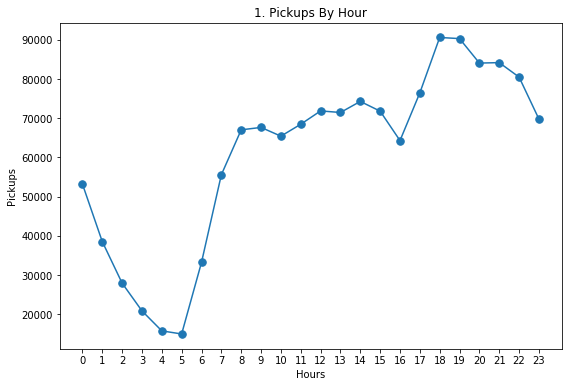

In [41]:
plt.plot(data.groupby(pd.to_datetime(data['pickup_datetime']).dt.hour).size(), marker=".", markersize=15)
plt.xticks(np.arange(0,24))
plt.title('1. Pickups By Hour')
plt.ylabel("Pickups")
plt.xlabel("Hours")

**2. Passenger Count Shares**

Цель: увидеть распределение поездок по количеству пассажиров.

Переменные: passenger_count.

Тип графика: круговая диаграмма, поскольку на ней хорошо видна часть от целого.


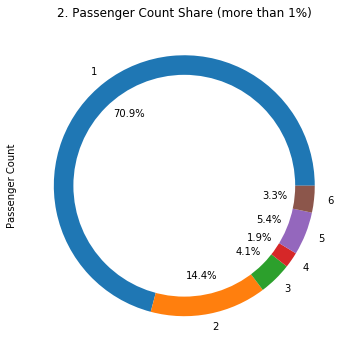

In [38]:
passenger_count_shares = pd.DataFrame({'share' : data.groupby( ['passenger_count'] ).size() / len(data) * 100}).reset_index()
passenger_count_shares_more_1 = passenger_count_shares[passenger_count_shares.share > 1]

plt.pie(passenger_count_shares_more_1['share'], labels=passenger_count_shares_more_1['passenger_count'], autopct='%1.1f%%', pctdistance = 0.7)
plt.title('2. Passenger Count Share (more than 1%)')
plt.ylabel ('Passenger Count')

centre_circle = plt.Circle((0,0), 0.85 ,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


**3. Trips By Duration**

Цель: увидеть распределение длительности поездок меньше часа. 

Переменные: trip_duration.

Тип: график распределения, поскольу на неём хорошо видна форма распределения.


Text(0.5, 1.0, '3. Trips By Duration')

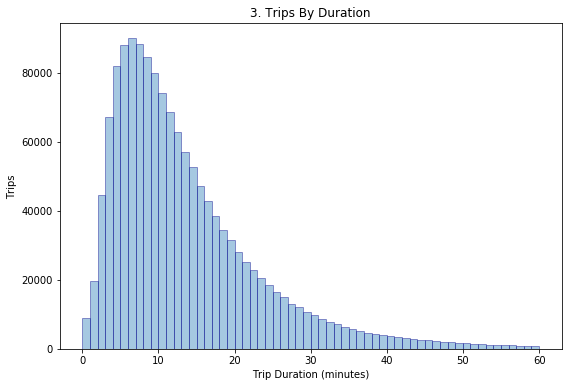

In [42]:
data_trips_less_hour = data['trip_duration'].astype(int)
data_trips_less_hour = data[data['trip_duration'] < 3600]
ax = sns.distplot(data_trips_less_hour['trip_duration'] / 60, kde=False, hist_kws={'edgecolor':'darkblue'}, bins = 60)
ax.set(xlabel='Trip Duration (minutes)', ylabel='Trips')
plt.title('3. Trips By Duration')

**4. Pickups On Map**

Цель: увидеть на карте, откуда водители забирают пассажиров.

Переменные: pickup_longitude, pickup_latitude

Тип графика: точечная диаграмма на карте, поскольку на ней места видно наиболее наглядно.


In [4]:
!git clone https://github.com/geopandas/geopandas.git
!pip install -q geopandas

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

Cloning into 'geopandas'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 7263 (delta 4), reused 4 (delta 0), pack-reused 7237
Receiving objects: 100% (7263/7263), 25.58 MiB | 19.19 MiB/s, done.
Resolving deltas: 100% (4687/4687), done.
     |████████████████████████████████| 921kB 8.9MB/s 
     |████████████████████████████████| 11.8MB 24.0MB/s 
     |████████████████████████████████| 10.1MB 50.2MB/s 


Text(0.5, 1, '4. Pickups On Map')

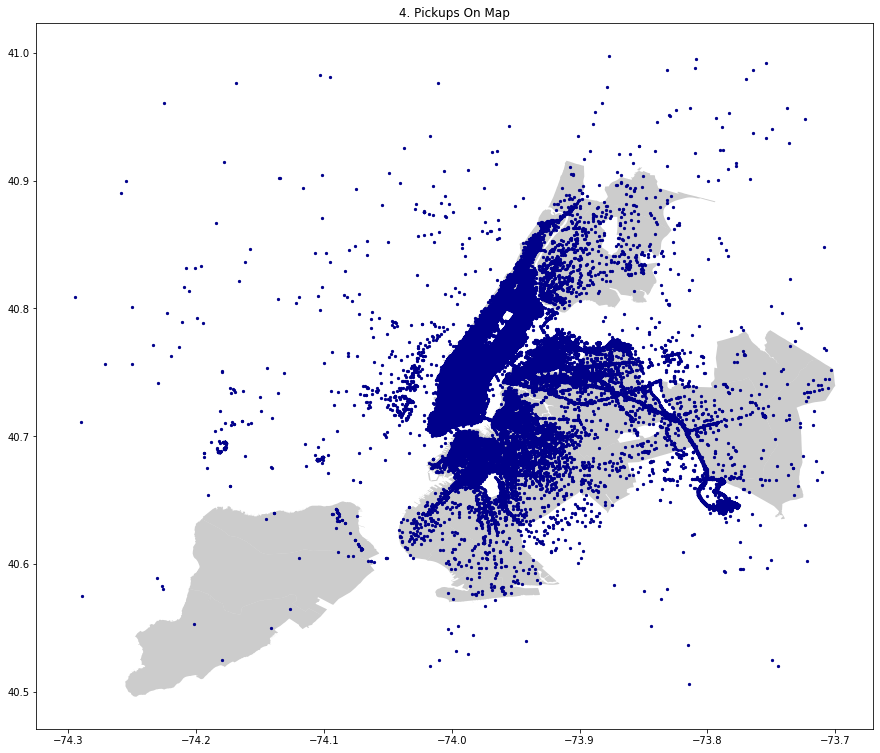

In [40]:
data_pickups_in_nyc = data[(data['pickup_longitude'] >= -74.3) & (data['pickup_longitude'] <= -73.7) & (data['pickup_latitude'] >= 40.5) & (data['pickup_latitude'] <= 41)]

crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(data_pickups_in_nyc['pickup_longitude'], data_pickups_in_nyc['pickup_latitude'])]
geometry[:3]

geo_data = gpd.GeoDataFrame(data_pickups_in_nyc,
                            crs = crs,
                            geometry = geometry)

street_map = gpd.read_file('geo_export_45113e82-81f4-406e-b3d8-fb8f52709949.shp')
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_data.plot(ax=ax, markersize = 5, color = 'darkblue')
plt.title('4. Pickups On Map')

**5. Trip Duration By Week Days**

Цель: Увидеть медиану, размер статистически значимой выборки, межквартильный размах и выбросы количества пассажиров для второго перевозчика.

Переменные: trip_duration

Тип графика: боксплот, поскольку на одном графике видны все перечисленные показатели.


Text(0.5, 1.0, '5. Passenger Count Vendor 1 Boxplot')

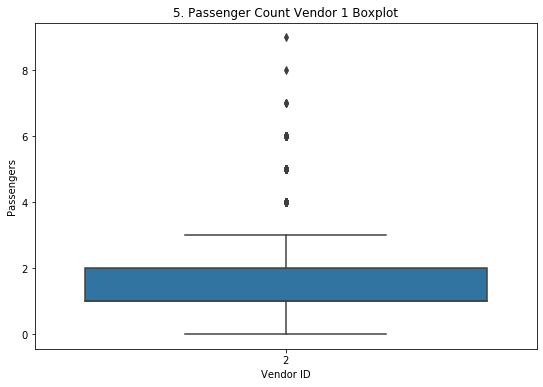

In [107]:
ax = sns.boxplot(x='vendor_id', y='passenger_count', data = data[data.vendor_id==2])
ax.set(xlabel='Vendor ID', ylabel='Passengers')
plt.title('5. Passenger Count Vendor 1 Boxplot')

